# Car Aunction Prices analysis 

## Notebook Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style to 'darkgrid'
sns.set_style('darkgrid')

# Execute the matplotlib magic function to ensure plots are displayed inline
%matplotlib inline

## Read in Data

In [3]:
file_path = 'C:/Users/zha/Desktop/car_prices.csv'

In [4]:
df = pd.read_csv(file_path, encoding = 'unicode_escape',low_memory = False)
df.drop(labels = ['Unnamed: 16'], axis = 1, inplace = True)
print('{:d} rows, {:d} columns'.format(*df.shape))

558837 rows, 16 columns


In [5]:
# first few data
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Evaluate and Clean Variables

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


Text(0.5, 1.0, 'Proportion of Missing Values in Each Variable')

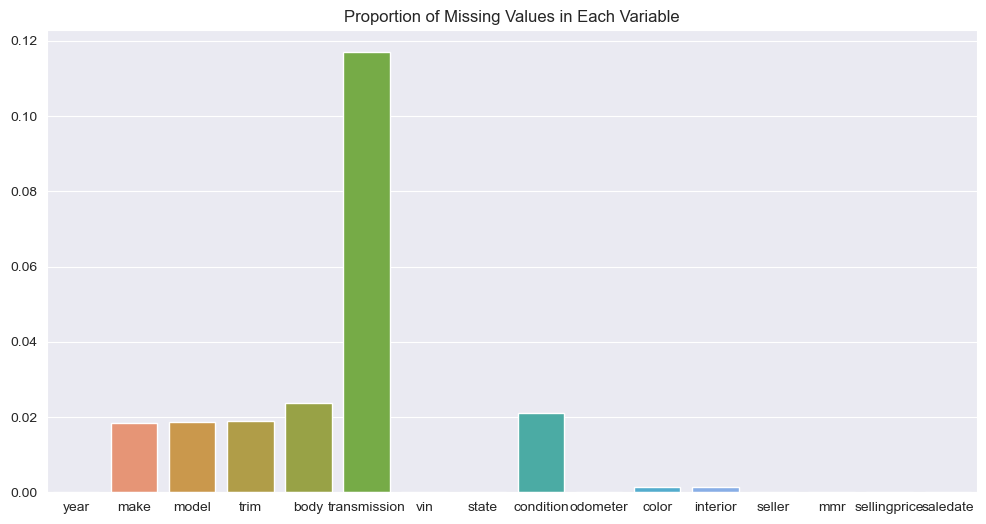

In [7]:
Missing_count = df.isna().mean(axis = 0)
fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (12,6))
sns.barplot(x = Missing_count.index, y = Missing_count.values, ax = ax)
plt.title('Proportion of Missing Values in Each Variable')

In [8]:
# Note only transmission variable has considerable missing value.
# We decide to remove na's from the dataframe.
df = df.dropna().reset_index(drop = True)

In [9]:
# Since vin refers to the vehicle identification number and is supposed to be unique. I decide to check if there are duplicated rows.
# Count rows with duplicated vin values 
df['vin'].duplicated().sum()

6578

In [10]:
# Randomly choose one duplicated vin and see their difference in terms of other variables
duplicated_vin = df['vin'][df['vin'].duplicated()].iloc[0]
df[df['vin'] == duplicated_vin]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
4179,1999,Infiniti,QX4,Base,SUV,automatic,jnrar05y4xw049475,ca,2.8,1.0,silver,beige,james family auto sales,3675,350,Tue Dec 30 2014 13:00:00 GMT-0800 (PST)
17423,1999,Infiniti,QX4,Base,SUV,automatic,jnrar05y4xw049475,ca,2,188185.0,silver,beige,james family auto sales,1925,1100,Thu Jan 29 2015 04:00:00 GMT-0800 (PST)


In [11]:
# Note they are only different at sellingprice and saledate, 
# Since we want to predict the sellingprice. It may affect our analysis, I decide to drop the duplicated rows.
df = df[~df['vin'].duplicated()].reset_index(drop = True)

In [12]:
# Note there are some strange value within color and interior variable, such as ¡ª. 
# In the original data, it is the '-' value. This may refer to the unknown value.
df['color'].value_counts()
df['interior'].value_counts()

black        206999
gray         150502
beige         49740
tan           37171
¡ª             9767
brown          6985
red            1108
silver          978
blue            907
off-white       355
gold            284
purple          282
white           211
green           199
burgundy        152
orange          121
yellow           19
Name: interior, dtype: int64

In [13]:
# Thus, we want to repalce '¡ª' with 'unknown'
df = df.replace({'¡ª':'unknown'})

In [14]:
df['state'].value_counts()

fl                   74376
ca                   64891
tx                   40954
ga                   30312
pa                   23873
nj                   22890
il                   21350
oh                   19977
tn                   18675
nc                   18325
mo                   15083
mi                   14116
nv                   11413
md                    9705
va                    9301
wi                    9138
mn                    8572
az                    7519
wa                    6967
co                    6215
ma                    6137
ny                    4728
in                    3854
sc                    3716
ne                    3649
pr                    2408
la                    1732
ms                    1719
ut                    1705
hi                    1201
or                    1040
nm                     163
ok                      54
al                      21
3vwd17aj4fm201708        1
Name: state, dtype: int64

In [15]:
# Then we check the value of state variable. There are two strange values which are obviously not state name.
# They looks like value from vin variable. 
df['state'].value_counts()
# By observing the row, it looks like all the value are shift one column to the right and this caused the problem.
df[(df['state'] == '3vwd17aj4fm201708')]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
339365,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj4fm201708,oh,4.6,4802,silver,gray,vw credit prequalified,13200,16500


In [16]:
# We will drop the mismatched row.
df = df.drop(labels = [339365], axis = 0).reset_index(drop = True)
# Capitalize the state
df['state'] = df['state'].apply(lambda x: x.upper())

In [17]:
# Then we check the sellingprice variable. Note that the minimum value is 1, which is not reasonable to be car selling price.
print(df['sellingprice'].describe())
# Hence, we decide to drop the corrsponding rows
cond = df['sellingprice'] == 1
df = df.loc[~cond,].reset_index(drop=True)

count    465779.000000
mean      13684.871050
std        9615.384037
min           1.000000
25%        7200.000000
50%       12200.000000
75%       18200.000000
max      230000.000000
Name: sellingprice, dtype: float64


Text(0.5, 0, 'Sale Price')

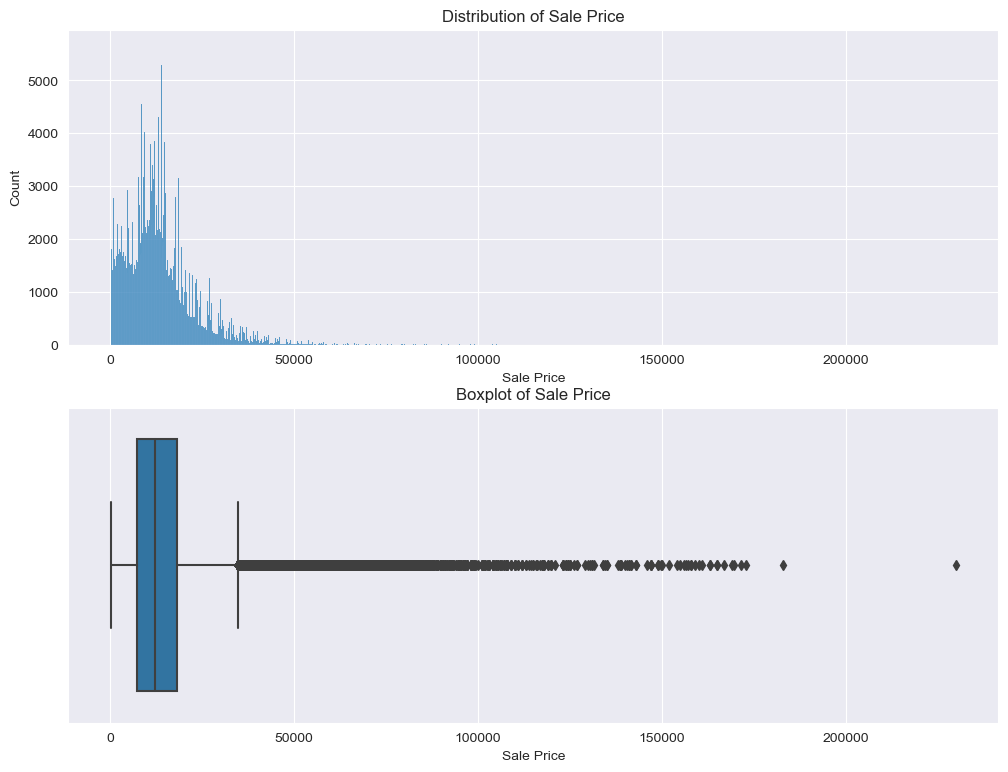

In [18]:
fig,ax = plt.subplots(nrows = 2, ncols = 1, figsize = (12,9))
sns.histplot(x='sellingprice',bins = 2000, data=df, fill = True, ax = ax[0])
ax[0].set_title('Distribution of Sale Price')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Sale Price')
sns.boxplot(x='sellingprice', data=df, ax = ax[1])
ax[1].set_title('Boxplot of Sale Price')
ax[1].set_xlabel('Sale Price')

In [19]:
# By observing the plots above, we found there are some extreme values which are far greater than the upper quantile.
# Thus, we want to look these rows in detail
df[df['sellingprice'] > 100000]
# We see those cars are all luxury cars, so the high price seems to be reasonable and we decided not to remove those rows. 

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
990,2012,Ferrari,California,Base,Convertible,automatic,zff65tja5c0187066,CA,4.2,10902.0,gray,brown,chicago motor car corporation,149000,154000,Tue Dec 30 2014 12:30:00 GMT-0800 (PST)
4622,2014,Land Rover,Range Rover,Autobiography LWB,SUV,automatic,salgv3tf1ea155989,CA,4.6,5369.0,white,orange,land rover north america llc,136000,135000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
4652,2014,Land Rover,Range Rover,Supercharged,SUV,automatic,salgs2ef9ea126773,CA,4.4,4460.0,brown,brown,land rover north america llc,103000,108000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
4806,2014,Mercedes-Benz,G-Class,G63 AMG,SUV,automatic,wdcyc7df6ex216753,CA,5,980.0,charcoal,black,chings trading,133000,134000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
4911,2013,Bentley,Continental GTC,Base,Convertible,automatic,scbgu3za5dc085358,CA,4,16603.0,blue,beige,porsche fin svcs dba bentley financial services,149000,139000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464404,2011,Audi,R8,4.2 quattro Spyder,Convertible,automatic,wuasuafg6bn001668,CA,4.3,1913.0,black,black,mckenna audi/mckenna bmw,100000,102000,Thu Jun 18 2015 05:00:00 GMT-0700 (PDT)
464946,2012,Rolls-Royce,Ghost,EWB,sedan,automatic,sca664l50cux65625,CA,3.6,11832.0,white,black,bentley scottsdale,164000,169000,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
465155,2014,BMW,i8,Base,coupe,automatic,wby2z2c56evx64302,CA,4.2,2668.0,white,brown,"carbiz solutions, inc.",145000,143000,Thu Jun 18 2015 05:00:00 GMT-0700 (PDT)
465240,2013,Mercedes-Benz,G-Class,G63 AMG,suv,automatic,wdcyc7df7dx199962,CA,4.7,21727.0,black,black,ferrari of orange county,107000,110000,Thu Jun 18 2015 05:00:00 GMT-0700 (PDT)


# Recommendation 

In [20]:
# We choose to use content-based filtering
# In order to be able to compute the similarity of each vehicle, we need to do some variable transformations
# We first modify mmr variable which is the market estimated price for the car.
# We want to classify vehicle into several groups according to its estimated price. For example, start from the minimum value, 
# every 5000 dollor will become a group.
# So we need to determine how to divide the vehicles. 
df['mmr'] = df['mmr'].apply(lambda x: int(x))

In [21]:
# We noticed that the maximum value of mmr is far greater than the upper quantile, which suggests there are some outliers. 
# We decide to treat the outliers as one group and divide the rest evenly. 
df.mmr.describe()

count    465777.000000
mean      13833.762938
std        9537.323730
min          25.000000
25%        7425.000000
50%       12300.000000
75%       18300.000000
max      182000.000000
Name: mmr, dtype: float64

In [22]:
df.mmr[df.mmr<18300+1.5*(18300-7425)].describe()

count    451931.000000
mean      12873.718554
std        7543.590656
min          25.000000
25%        7225.000000
50%       12100.000000
75%       17550.000000
max       34600.000000
Name: mmr, dtype: float64

In [23]:
price_bins = list(np.arange(25,34600,3000))
price_bins.append(182000)

In [24]:
price_label = []
for i in range(1,len(price_bins)):
       price_label.append(f'price_level_{i}')

In [25]:
df['price_binned'] = pd.cut(x = df.mmr, bins = price_bins, right = True, include_lowest = True, labels = price_label)

In [26]:
df.odometer.describe()

count    465777.000000
mean      66654.300558
std       52057.811644
min           1.000000
25%       28032.000000
50%       50863.000000
75%       96613.000000
max      999999.000000
Name: odometer, dtype: float64

In [27]:
df.odometer[df.odometer<96613+1.5*(96613-28032)].describe()

count    456860.000000
mean      63291.365712
std       45473.329222
min           1.000000
25%       27606.750000
50%       49564.000000
75%       93591.000000
max      199484.000000
Name: odometer, dtype: float64

In [28]:
odometer_bins = list(np.arange(1,199484,10000))
odometer_bins.append(999999)

In [29]:
odometer_label = []
for i in range(1,len(odometer_bins)):
       odometer_label.append(f'odometer_level_{i}')

In [30]:
df['odometer_binned'] = pd.cut(x = df.odometer, bins = odometer_bins, right = True, include_lowest = True, labels = odometer_label)

In [31]:
df['condition'] = df.condition.apply(lambda x: float(x))

In [32]:
# We subset the original data set by chooseing features that would be used to characterize a vehicle
df_rec = df[['year','body','transmission','condition','odometer_binned','color','interior','price_binned']]
# Note that this will introduce many duplicated rows as we only choose certain features. 
df_rec.duplicated().sum()

121622

In [33]:
# We only retain unqiue cars and we decide to preserve the original index so when we find two similar cars, we can go back and check if it is reasonable. 
df_rec = df_rec[~df_rec.duplicated()].reset_index()

In [34]:
# This is how processed data look like.
df_rec.head()

,index,year,body,transmission,condition,odometer_binned,color,interior,price_binned
0,0,2015,SUV,automatic,5.0,odometer_level_2,white,black,price_level_7
1,1,2015,SUV,automatic,5.0,odometer_level_1,white,beige,price_level_7
2,2,2014,Sedan,automatic,4.5,odometer_level_1,gray,black,price_level_11
3,3,2015,Sedan,automatic,4.1,odometer_level_2,white,black,price_level_10
4,4,2014,Sedan,automatic,4.3,odometer_level_1,gray,black,price_level_12


In [35]:
# year_dummies = pd.get_dummies(df_rec.year, prefix='Year')
# Then we need to convert categorical variables into dummy variables.
body_dummies = pd.get_dummies(df_rec.body, prefix='Body')
transmission_dummies = pd.get_dummies(df_rec.transmission, prefix='Trans')
odometer_binned_dummies = pd.get_dummies(df_rec.odometer_binned)
color_dummies = pd.get_dummies(df_rec.color, prefix='Color')
interior_dummies = pd.get_dummies(df_rec.interior, prefix='Interior')
price_binned_dummies = pd.get_dummies(df_rec.price_binned)

X = df_rec[['condition','year']].join([body_dummies,transmission_dummies,odometer_binned_dummies,color_dummies,interior_dummies,price_binned_dummies])
X.head()

assert X.shape[0] == df_rec.shape[0]

In [36]:
# Due to the limit capacity of the in-memory storage, we choose 10000 records and standardize them. 
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X.iloc[:10000,])

In [37]:
from sklearn.metrics.pairwise import euclidean_distances

dists = euclidean_distances(X_scaled)
np.round(dists,2)


array([[ 0.  ,  6.72, 11.22, ..., 13.58,  6.51, 12.42],
       [ 6.72,  0.  , 10.39, ..., 14.1 ,  7.55, 13.84],
       [11.22, 10.39,  0.  , ..., 16.18, 10.88, 15.7 ],
       ...,
       [13.58, 14.1 , 16.18, ...,  0.  , 13.06,  9.92],
       [ 6.51,  7.55, 10.88, ..., 13.06,  0.  , 13.3 ],
       [12.42, 13.84, 15.7 , ...,  9.92, 13.3 ,  0.  ]])

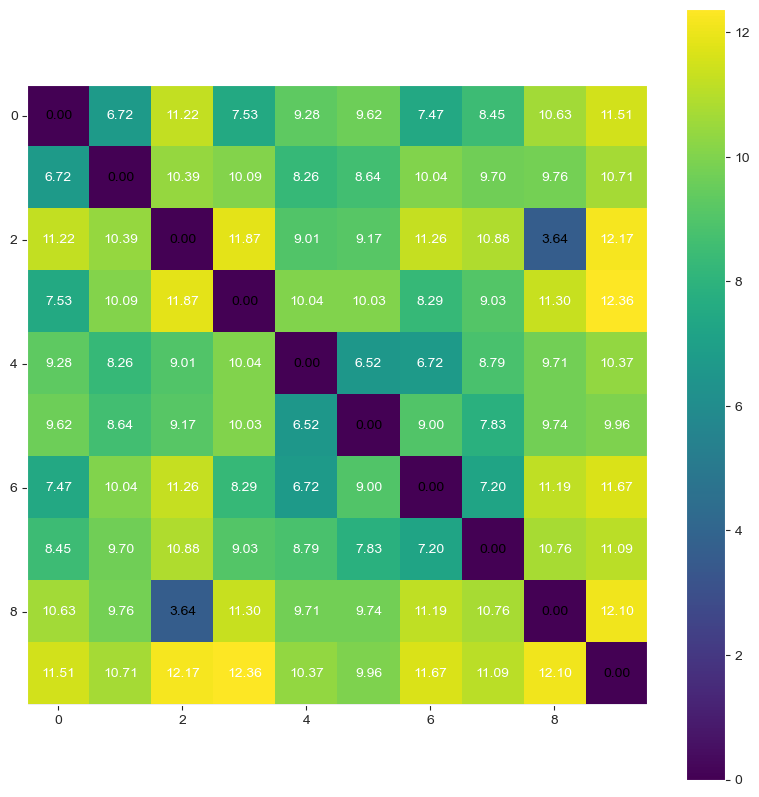

In [38]:
from mlxtend.plotting import heatmap
heatmap(np.round(dists[:10,:10],2),figsize=(10,10));
# The ith entry in the jth column shows the distance between ith vehicle and jth vehicle. 
# The lighter than block is, the less similarity the two vehicles share

In [39]:
# Now, we want to check if this recommendation algorithm makes sense
# Suppose I am interested in vehicle 6 and I want to see all vehicles that are similar to vehicle 6
query_idx = 6

# find indexes of best scores (for distances, want ascending)
best_idxs_asc = np.argsort(dists[query_idx])[:10]

# the top 10 recommendations with their distances
list(zip(['Vehicle '+str(x) for x in best_idxs_asc],
         np.round(dists[query_idx][best_idxs_asc],2)
        )
    )

[('Vehicle 6', 0.0),
 ('Vehicle 32', 0.43),
 ('Vehicle 6063', 0.52),
 ('Vehicle 583', 0.61),
 ('Vehicle 752', 0.65),
 ('Vehicle 670', 0.88),
 ('Vehicle 399', 1.11),
 ('Vehicle 4693', 1.17),
 ('Vehicle 4793', 1.21),
 ('Vehicle 10', 1.49)]

In [40]:
# We can check that recommended vehicles are similar to the car that I am interested except for the brand. But it is reasonable to assume that the target customer
# of BMW will be also interested in Mercedes-Benz or Audi. 
df.loc[df_rec['index'].loc[best_idxs_asc]]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,price_binned,odometer_binned
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,CA,3.4,14943.0,black,black,the hertz corporation,69000,65000,Wed Dec 17 2014 12:30:00 GMT-0800 (PST),price_level_12,odometer_level_2
32,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c56ed593069,CA,3.8,16360.0,black,black,the hertz corporation,65000,64250,Tue Jan 13 2015 04:30:00 GMT-0800 (PST),price_level_12,odometer_level_2
6234,2013,Mercedes-Benz,E-Class,E350 Sport,Sedan,automatic,wddhf5kb5da724012,CA,3.8,12440.0,black,black,mercedes-benz financial services,34400,33500,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),price_level_12,odometer_level_2
612,2013,Porsche,Panamera,Base,Sedan,automatic,wp0aa2a73dl016450,CA,3.9,12379.0,black,black,the hertz corporation,61000,59750,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),price_level_12,odometer_level_2
785,2012,Audi,A6,3.0T Premium quattro,Sedan,automatic,waubgafc0cn029580,CA,3.6,13936.0,black,black,ars/executive car leasing co,33900,33100,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),price_level_12,odometer_level_2
701,2012,Audi,S4,Premium Plus quattro,Sedan,automatic,waukgafl7ca117999,CA,2.8,13044.0,black,black,fratelli investment group,37800,35250,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),price_level_12,odometer_level_2
422,2013,Mercedes-Benz,S-Class,S550,Sedan,automatic,wddng7db3da492051,CA,4.4,14557.0,black,black,mercedes-benz financial services,53000,51500,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),price_level_12,odometer_level_2
4818,2014,Mercedes-Benz,S-Class,S550,Sedan,automatic,wddug8cbxea042417,CA,4.5,10480.0,black,black,enterprise vehicle exchange/orange,80000,84000,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),price_level_12,odometer_level_2
4925,2013,Audi,S6,Prestige,Sedan,automatic,wauf2afc5dn109023,CA,2.3,10464.0,black,black,fratelli investment group,48100,43500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),price_level_12,odometer_level_2
10,2014,Audi,A6,3.0T Prestige quattro,Sedan,automatic,wauhgafc0en062916,CA,4.8,14414.0,black,black,desert auto trade,47300,49750,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),price_level_12,odometer_level_2


## Enginner New Features

In [41]:
# combine the features of make and model to one
df['vehicle'] = df.apply(lambda row: row['make']+' '+row['model'], axis = 1)

In [42]:
# Our target predictors will be vehicle, state, condition, odometer, and color
# We need to convert the categorical variables to dummy variables
vehicle_dummies = pd.get_dummies(df.vehicle, prefix='Ve')
state_dummies = pd.get_dummies(df.state, prefix='St')
color_dummies = pd.get_dummies(df.color, prefix='Co')

X = df[['condition','odometer']].join([vehicle_dummies,state_dummies,color_dummies])
y = df.loc[:,'sellingprice']
assert X.shape[0] == y.shape[0]

In [43]:
X.shape

(465777, 832)

## Train Model and Evaluate

### Linear Regression and Cross-Validation

In [44]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split X and y_r into 80% train and 20% test using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [45]:
# Import the LinearRegression model from sklearn
from sklearn.linear_model import LinearRegression

# Instantiate a LinearRegression model with default arguments and fit on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Calculate and print the training set R^2 of the LinearRegression model
lr_training_r2 = lr.score(X_train, y_train)

print(f'The training set R^2 of the LinearRegression Model is: {lr_training_r2:.2f}')

The training set R^2 of the LinearRegression Model is: 0.78


In [82]:
# Use 5-fold Cross Validation to get a sense of variation  of Liner Regression R^2 performance on the training set.

# Import cross_val_score from sklearn.
from sklearn.model_selection import cross_val_score

# Generate 5-fold cross-validation R^2 scores for a LinearRegression model with default arguments on the training set
lr_cv_scores = cross_val_score(lr, X_train, y_train, cv = 5)

# Print out the R^2 scores found by cross_val_score
np.round(lr_cv_scores,2)

array([0.77, 0.78, 0.77, 0.78, 0.78])

In [83]:
# Calculate the mean cross validation score using the scores created above
lr_cv_mean = np.mean(lr_cv_scores)

# Calculate 2 standard deviations of the cross validation scores
lr_cv_2std = 2 * np.std(lr_cv_scores)

# Print out the mean R^2 +- 2 standard variations for the LinearRegression model
print(f'lr mean cv r2: {lr_cv_mean:.2f} +- {lr_cv_2std:.2f}')

lr mean cv r2: 0.78 +- 0.01


In [84]:
# Evaluate on test set
lr_test_r2 = lr.score(X_test, y_test)
print(f'The test set R^2 of the LinearRegression Model is: {lr_test_r2: .2f}')

The test set R^2 of the LinearRegression Model is:  0.78


### Which features are important?

In [46]:
# In order to be able to compare the importance of each feature,
# we need first to scale each feature so that it is meaningful to compare the magnitude
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), LinearRegression())

model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [47]:
# create a dataframe to store the absolute value of each coefficient
coefs = pd.DataFrame(
   abs(model[1].coef_),
   columns=['Coefficients'], index=X_train.columns
)
coefs = coefs.reset_index()

In [48]:
# list the coefficient in a descending order.
# We can observe that the top five most influential features are Co_yellow, condition, odometer, Ve_Acural CL, and Ve_Acural ILX
coefs.iloc[coefs['Coefficients'].argsort()[::-1]].reset_index(drop = True)

,index,Coefficients
0,Ve_Chevrolet Corsica,3.166595e+15
1,Ve_Bentley Continental GTC Speed,3.035756e+15
2,Ve_Dodge Spirit,1.263815e+15
3,St_FL,9.119040e+14
4,St_CA,8.614690e+14
...,...,...
827,Co_lime,1.808481e+12
828,odometer,4.494650e+03
829,condition,2.093214e+03
830,Ve_Isuzu Rodeo Sport,8.437500e-01


## Feature Selection: LASSO

In [49]:
from sklearn.linear_model import Lasso
lr = Lasso(alpha=0.1)
lr.fit(X_train, y_train)

Lasso(alpha=0.1)

In [50]:
# create a dataframe to store the absolute value of each coefficient
coefs = pd.DataFrame(
   abs(lr.coef_),
   columns=['Coefficients'], index=X_train.columns
)
coefs = coefs.reset_index()

In [51]:
# list the coefficient in a descending order.
# We can observe that the top 4 most influential features are Ve_Rolls-Royce Ghost, Ve_BMW i8, Ve_Ferrari 458 Italia, Ve_Ferrari California	
coefs.iloc[coefs['Coefficients'].argsort()[::-1]].reset_index(drop = True)

,index,Coefficients
0,Ve_Rolls-Royce Ghost,131900.026288
1,Ve_BMW i8,130292.878934
2,Ve_Ferrari 458 Italia,125024.838277
3,Ve_Ferrari California,110505.099164
4,Ve_Mercedes-Benz SLS AMG GT,99550.850546
...,...,...
827,Ve_Chevrolet C/K 1500 Series,0.000000
828,Ve_Ford Mustang SVT Cobra,0.000000
829,Ve_Toyota Pickup,0.000000
830,Ve_Mercury Milan Hybrid,0.000000


In [52]:
# We only keep features with coefficients none zero. Note that this reduced 179 features.
coefs['index'][coefs['Coefficients'] != 0]

0         condition
1          odometer
2       Ve_Acura CL
3      Ve_Acura ILX
6      Ve_Acura MDX
           ...     
827       Co_silver
828    Co_turquoise
829      Co_unknown
830        Co_white
831       Co_yellow
Name: index, Length: 653, dtype: object

In [53]:
# Evaluate on test set and we find the regularized linear model has the same performance as unregularized has on test set
lr_test_r2 = lr.score(X_test, y_test)
print(f'The test set R^2 of the LinearRegression Model with LASSO Regularization is: {lr_test_r2: .2f}')

The test set R^2 of the LinearRegression Model with LASSO Regularization is:  0.78


## Feature Selection: SelectFromModel

In [133]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(lr,
                      threshold=None, 
                      prefit=True 
                     )
# We anticipate that by using SelectFromModel method, we end up getting the same features as above since the criterions are the same. 
np.sum(X_train.columns[sfm.get_support()] != coefs['index'][coefs['Coefficients'] != 0])

0

## Feature Selection: Univariate Tests

In [54]:
from sklearn.feature_selection import SelectKBest, f_regression

# select 2 best features
kbest = SelectKBest(score_func=f_regression,
                    k=653             
                   ).fit(X_train, y_train)
candidate_feature = list(X_train.columns[kbest.get_support()])

C:\Users\zha\.conda\envs\tf2\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [55]:
# Note that choosing 653 features by using F-test Versus LASSO Regularization share only 52 common features. 
np.sum(candidate_feature == coefs['index'][coefs['Coefficients'] != 0])

52

In [56]:
cond = candidate_feature == coefs['index'][coefs['Coefficients'] != 0]
common_feature  = coefs['index'][coefs['Coefficients'] != 0][cond]
common_feature

0                       condition
1                        odometer
2                     Ve_Acura CL
3                    Ve_Acura ILX
15                   Ve_Acura ZDX
17            Ve_Aston Martin DB9
18         Ve_Aston Martin Rapide
19     Ve_Aston Martin V8 Vantage
585                Ve_Nissan 350Z
586                Ve_Nissan 370Z
587              Ve_Nissan Altima
588       Ve_Nissan Altima Hybrid
589              Ve_Nissan Armada
590                Ve_Nissan Cube
621        Ve_Oldsmobile Intrigue
622      Ve_Oldsmobile Silhouette
788                         St_MA
789                         St_MD
790                         St_MI
791                         St_MN
792                         St_MO
797                         St_NM
798                         St_NV
799                         St_NY
800                         St_OH
801                         St_OK
802                         St_OR
803                         St_PA
804                         St_PR
805           

In [57]:
X_train_1 = X_train.loc[:,candidate_feature]
X_test_1 = X_test.loc[:,candidate_feature]

In [58]:
# Instantiate a LinearRegression model with default arguments and fit on the training set
lr = LinearRegression()
lr.fit(X_train_1, y_train)

# Calculate and print the training set R^2 of the LinearRegression model
lr_training_r2 = lr.score(X_train_1, y_train)

print(f'The training set R^2 of the LinearRegression Model is: {lr_training_r2:.2f}')

The training set R^2 of the LinearRegression Model is: 0.77


In [59]:
# Evaluate on test set
lr_test_r2 = lr.score(X_test_1, y_test)
print(f'The test set R^2 of the LinearRegression Model fit by using features selected by F-test is: {lr_test_r2: .2f}')

The test set R^2 of the LinearRegression Model fit by using features selected by F-test is:  0.78


In [60]:
X_train_2 = X_train.loc[:,common_feature]
X_test_2 = X_test.loc[:,common_feature]

In [61]:
# Instantiate a LinearRegression model with default arguments and fit on the training set
lr = LinearRegression()
lr.fit(X_train_2, y_train)

# Calculate and print the training set R^2 of the LinearRegression model
lr_training_r2 = lr.score(X_train_2, y_train)

print(f'The training set R^2 of the LinearRegression Model is: {lr_training_r2:.2f}')

The training set R^2 of the LinearRegression Model is: 0.43


In [62]:
# Evaluate on test set
lr_test_r2 = lr.score(X_test_2, y_test)
print(f'The test set R^2 of the LinearRegression Model fit by using common features selected by LASSO and F-test is: {lr_test_r2: .2f}')

The test set R^2 of the LinearRegression Model fit by using common features selected by LASSO and F-test is:  0.43


### Random Forest 

In [63]:
# We also want to use random forest algorithm and compare its performance with LinearRegression
# Since there are hundreds of features, it will take a long time to fit the model.
# We decide to cut the features based on what we observed in LinearRegression
# We will use condition, odometer, and make features. 
# We need to convert the categorical variables to dummy variables
vehicle_dummies = pd.get_dummies(df.make, prefix='Ve')


X = df[['condition','odometer']].join(vehicle_dummies)
y = df.loc[:,'sellingprice']
assert X.shape[0] == y.shape[0]

# Split X and y_r into 80% train and 20% test using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [64]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(X_train, y_train)

# Calculate and print the training set R^2 of the Random Forest model
regr_training_r2 = regr.score(X_train, y_train)

print(f'The training set R^2 of the Random Forest Model is: {regr_training_r2:.2f}')

The training set R^2 of the Random Forest Model is: 0.94


In [82]:
# Use 3-fold Cross Validation to get a sense of variation of Random Forest R^2 performance on the training set.
regr_cv_scores = cross_val_score(regr, X_train, y_train, cv=3, n_jobs = -1)
regr_cv_scores

array([0.55962191, 0.56197988, 0.5608536 ])

In [92]:
# Calculate the mean cross validation score using the scores created above
regr_cv_mean = np.mean(regr_cv_scores)

# Calculate 2 standard deviations of the cross validation scores
regr_cv_2std = 2 * np.std(regr_cv_scores)

# Print out the mean R^2 +- 2 standard variations for the Random Forest model
print(f'regr mean cv r2: {regr_cv_mean:.2f} +- {regr_cv_2std:.2f}')

regr mean cv r2: 0.56 +- 0.00


In [65]:
# Find which features are important in Random Forest model
importances = regr.feature_importances_
for col,fi in sorted(list(zip(X.columns,importances)),key=lambda x:x[1])[::-1]:
    print(f'{col:20s} : {fi:0.3f}')

odometer             : 0.649
condition            : 0.125
Ve_BMW               : 0.035
Ve_Mercedes-Benz     : 0.027
Ve_Porsche           : 0.020
Ve_Lexus             : 0.015
Ve_Land Rover        : 0.013
Ve_Audi              : 0.011
Ve_Infiniti          : 0.009
Ve_Bentley           : 0.009
Ve_Ram               : 0.009
Ve_Rolls-Royce       : 0.008
Ve_GMC               : 0.007
Ve_Jaguar            : 0.006
Ve_Cadillac          : 0.006
Ve_Ferrari           : 0.006
Ve_Ford              : 0.005
Ve_Nissan            : 0.004
Ve_Lincoln           : 0.004
Ve_Chevrolet         : 0.003
Ve_Jeep              : 0.003
Ve_Kia               : 0.003
Ve_Maserati          : 0.003
Ve_Hyundai           : 0.003
Ve_Acura             : 0.002
Ve_Toyota            : 0.002
Ve_Tesla             : 0.001
Ve_Dodge             : 0.001
Ve_Honda             : 0.001
Ve_Subaru            : 0.001
Ve_Volvo             : 0.001
Ve_Chrysler          : 0.001
Ve_HUMMER            : 0.001
Ve_Buick             : 0.001
Ve_Aston Marti

In [94]:
# Import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[10,50,100,200],
           'max_depth':[1,2,3,5,10]}

regr_gscv = GridSearchCV(RandomForestRegressor(),
                    param_grid=params,     
                    cv=3,       
                    scoring = "r2",
                    refit=True,
                    n_jobs = -1) 
regr_gscv.fit(X_train,y_train)

print(f'regr best hyperparams      : {regr_gscv.best_params_}')
print(f'regr best mean cv accuracy : {regr_gscv.best_score_:.2f}')

regr best hyperparams      : {'max_depth': 10, 'n_estimators': 100}
regr best mean cv accuracy : 0.56


In [95]:
# Evaluate on test set
regr_test_r2 = regr_gscv.score(X_test, y_test)
print(f'The test set R^2 of the Random Forest Model is: {regr_test_r2: .2f}')
# Note it is much lower than what we get on train set. This indicates that our model is overfitting here.

The test set R^2 of the Random Forest Model is:  0.57


## Feature Selection: SelectFromModel

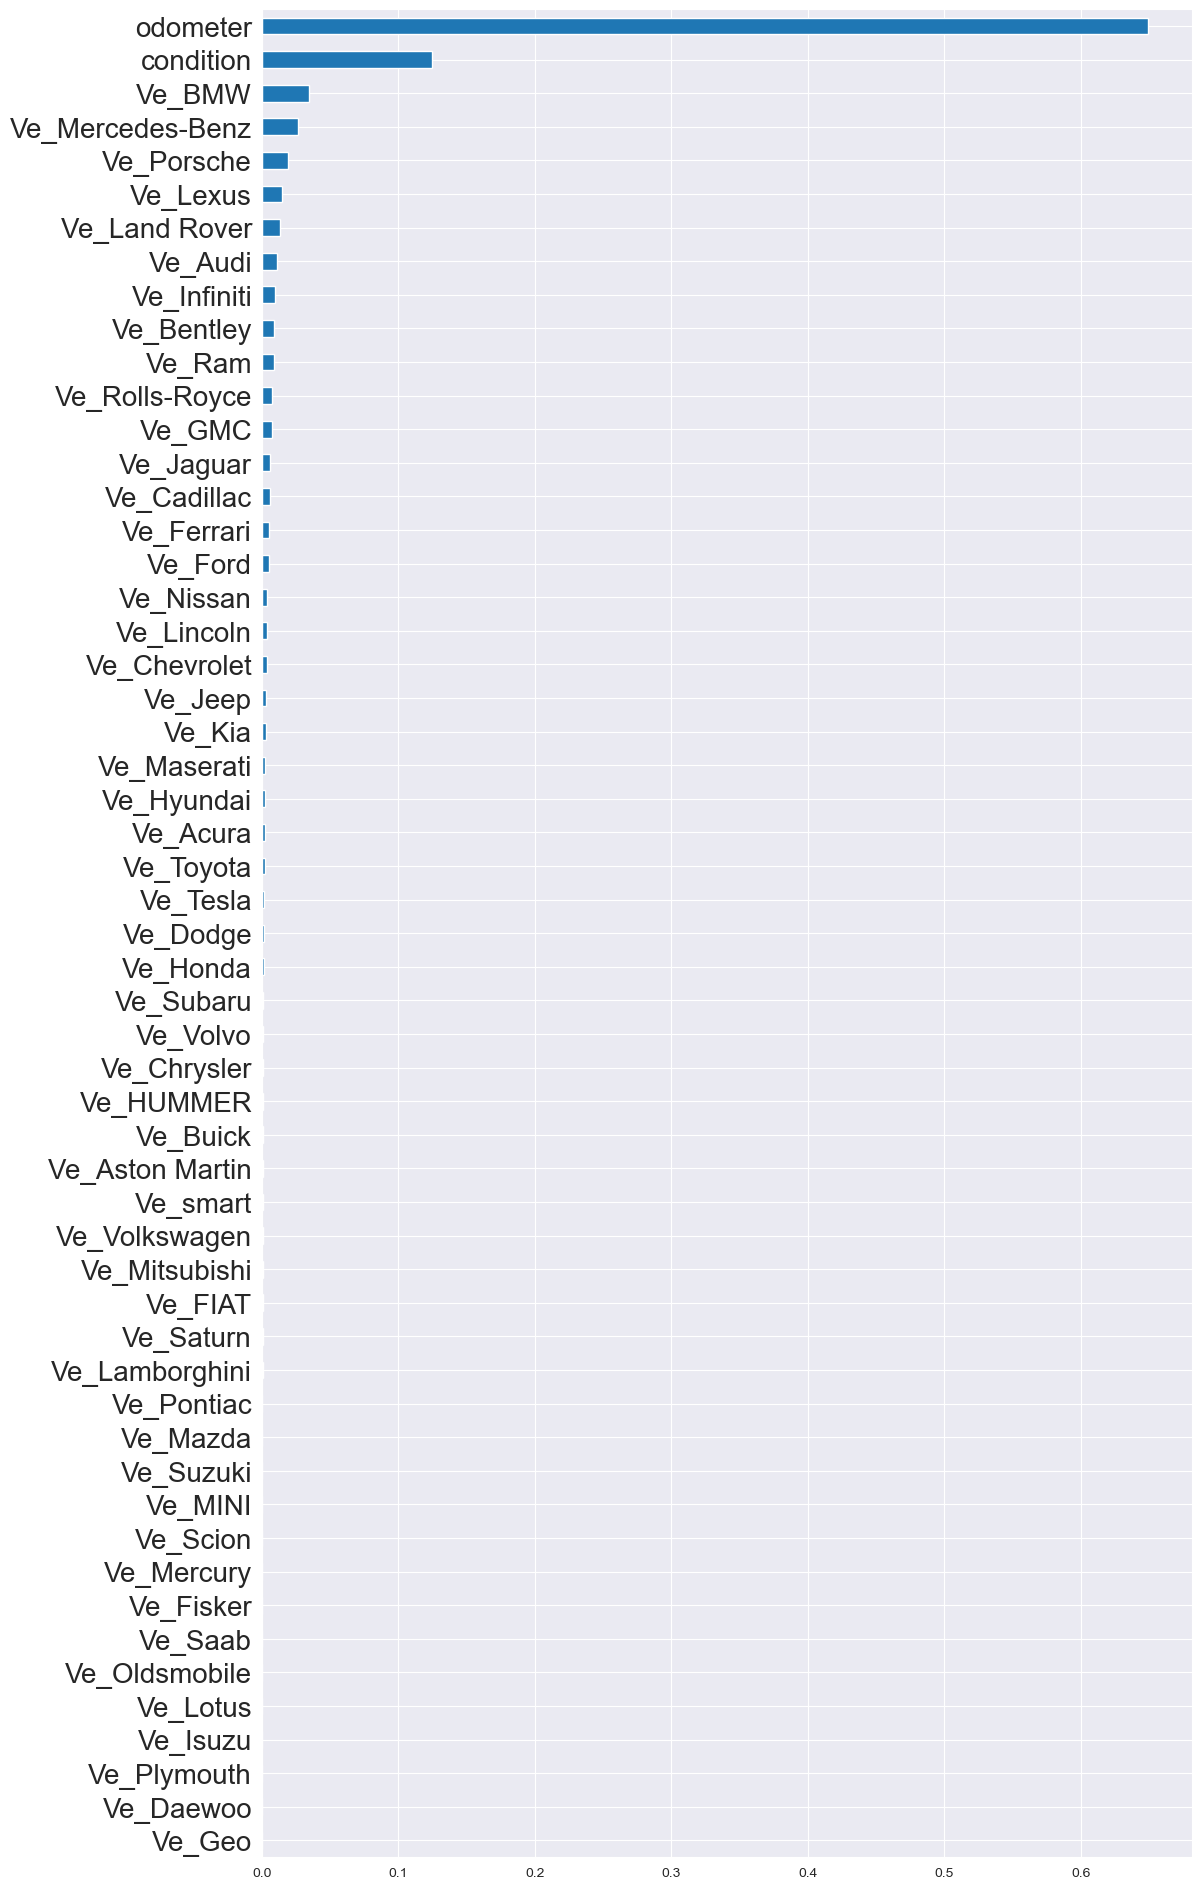

In [66]:
feature_importances = pd.Series(importances,index=X_train.columns)
fig,ax = plt.subplots(1,1,figsize=(12,24))
feature_importances.sort_values().plot.barh(ax=ax);
ax.set_yticklabels(ax.get_yticklabels(),fontsize=20);

In [68]:
from sklearn.feature_selection import SelectFromModel
sfm_rf = SelectFromModel(regr,
                         threshold='mean',   # return all features with value greater than the mean
                         prefit=True       # will refit
                        )
target_feature = X_train.columns[sfm_rf.get_support()]
print(target_feature)

X_train_subset = X_train.loc[:,target_feature]
X_test_subset = X_test.loc[:,target_feature]

Index(['condition', 'odometer', 'Ve_BMW', 'Ve_Mercedes-Benz', 'Ve_Porsche'], dtype='object')


In [69]:
regr = RandomForestRegressor()
regr.fit(X_train_subset, y_train)

# Calculate and print the training set R^2 of the Random Forest model
regr_training_r2 = regr.score(X_train_subset, y_train)

print(f'The training set R^2 of the Random Forest Model is: {regr_training_r2:.2f}')

The training set R^2 of the Random Forest Model is: 0.89


In [70]:
# Evaluate on test set
regr_test_r2 = regr.score(X_test_subset, y_test)
print(f'The test set R^2 of the Random Forest Model by using selected features is: {regr_test_r2: .2f}')
# Note it is much lower than what we get on train set. This indicates that our model is overfitting here.

The test set R^2 of the Random Forest Model by using selected features is:  0.36


## Dimensionality Reduction with PCA

In [73]:
X_train.shape

(372621, 55)

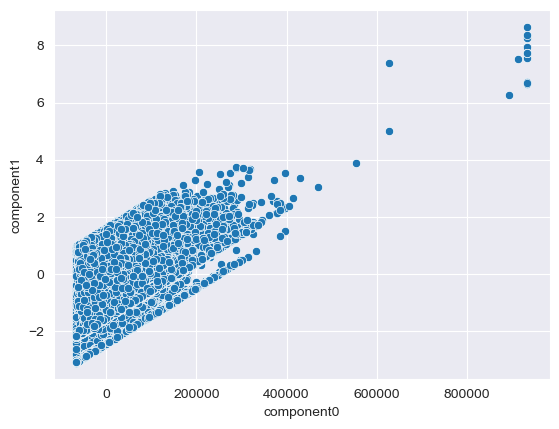

In [220]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_train)
X_2d = pd.DataFrame(X_2d, columns=["component"+str(i) for i in range(2)])
sns.scatterplot(x='component0',y='component1',data=X_2d);

In [221]:
print(' + \n'.join([f'{w: 0.2f}*{f}' for f,w in sorted(zip(X_train.columns,pca_2d.components_[0]),key=lambda x:x[1])]))

-0.00*condition + 
-0.00*Ve_Ford + 
-0.00*Ve_Nissan + 
-0.00*Ve_Kia + 
-0.00*Ve_Infiniti + 
-0.00*Ve_Hyundai + 
-0.00*Ve_Ram + 
-0.00*Ve_MINI + 
-0.00*Ve_BMW + 
-0.00*Ve_Subaru + 
-0.00*Ve_Mercedes-Benz + 
-0.00*Ve_Lincoln + 
-0.00*Ve_FIAT + 
-0.00*Ve_Porsche + 
-0.00*Ve_smart + 
-0.00*Ve_Mazda + 
-0.00*Ve_Land Rover + 
-0.00*Ve_Scion + 
-0.00*Ve_Audi + 
-0.00*Ve_Maserati + 
-0.00*Ve_Bentley + 
-0.00*Ve_Tesla + 
-0.00*Ve_Ferrari + 
-0.00*Ve_Rolls-Royce + 
-0.00*Ve_Aston Martin + 
-0.00*Ve_Fisker + 
-0.00*Ve_Plymouth + 
-0.00*Ve_Lamborghini + 
-0.00*Ve_Volkswagen + 
-0.00*Ve_Lotus + 
 0.00*Ve_Daewoo + 
 0.00*Ve_Geo + 
 0.00*Ve_Jaguar + 
 0.00*Ve_Chrysler + 
 0.00*Ve_Isuzu + 
 0.00*Ve_Lexus + 
 0.00*Ve_Saab + 
 0.00*Ve_Suzuki + 
 0.00*Ve_Oldsmobile + 
 0.00*Ve_HUMMER + 
 0.00*Ve_Mitsubishi + 
 0.00*Ve_Jeep + 
 0.00*Ve_Volvo + 
 0.00*Ve_Buick + 
 0.00*Ve_Mercury + 
 0.00*Ve_Cadillac + 
 0.00*Ve_Acura + 
 0.00*Ve_Saturn + 
 0.00*Ve_Toyota + 
 0.00*Ve_GMC + 
 0.00*Ve_Dodge + 
 0.00*Ve_Ponti

In [222]:
print(' + \n'.join([f'{w: 0.2f}*{f}' for f,w in sorted(zip(X_train.columns,pca_2d.components_[1]),key=lambda x:x[1])]))

-0.02*Ve_Chevrolet + 
-0.02*Ve_Nissan + 
-0.01*Ve_Honda + 
-0.01*Ve_Dodge + 
-0.01*Ve_Volkswagen + 
-0.01*Ve_Toyota + 
-0.01*Ve_Chrysler + 
-0.00*Ve_Hyundai + 
-0.00*Ve_Pontiac + 
-0.00*Ve_Mazda + 
-0.00*Ve_Mitsubishi + 
-0.00*Ve_Suzuki + 
-0.00*Ve_Mercury + 
-0.00*Ve_Scion + 
-0.00*Ve_Saturn + 
-0.00*Ve_Buick + 
-0.00*Ve_Jaguar + 
-0.00*Ve_Acura + 
-0.00*Ve_Oldsmobile + 
-0.00*Ve_Saab + 
-0.00*Ve_Isuzu + 
-0.00*Ve_FIAT + 
-0.00*Ve_Maserati + 
-0.00*Ve_Geo + 
-0.00*Ve_Bentley + 
-0.00*Ve_Plymouth + 
-0.00*Ve_Daewoo + 
-0.00*Ve_Lotus + 
-0.00*Ve_Aston Martin + 
-0.00*Ve_Fisker + 
 0.00*Ve_Lamborghini + 
 0.00*odometer + 
 0.00*Ve_Rolls-Royce + 
 0.00*Ve_Ferrari + 
 0.00*Ve_Tesla + 
 0.00*Ve_Audi + 
 0.00*Ve_Volvo + 
 0.00*Ve_smart + 
 0.00*Ve_Cadillac + 
 0.00*Ve_Porsche + 
 0.00*Ve_Ram + 
 0.00*Ve_HUMMER + 
 0.00*Ve_Land Rover + 
 0.00*Ve_MINI + 
 0.00*Ve_Lincoln + 
 0.00*Ve_Mercedes-Benz + 
 0.00*Ve_Subaru + 
 0.00*Ve_Lexus + 
 0.00*Ve_Infiniti + 
 0.01*Ve_Kia + 
 0.01*Ve_GMC + 
 0.01

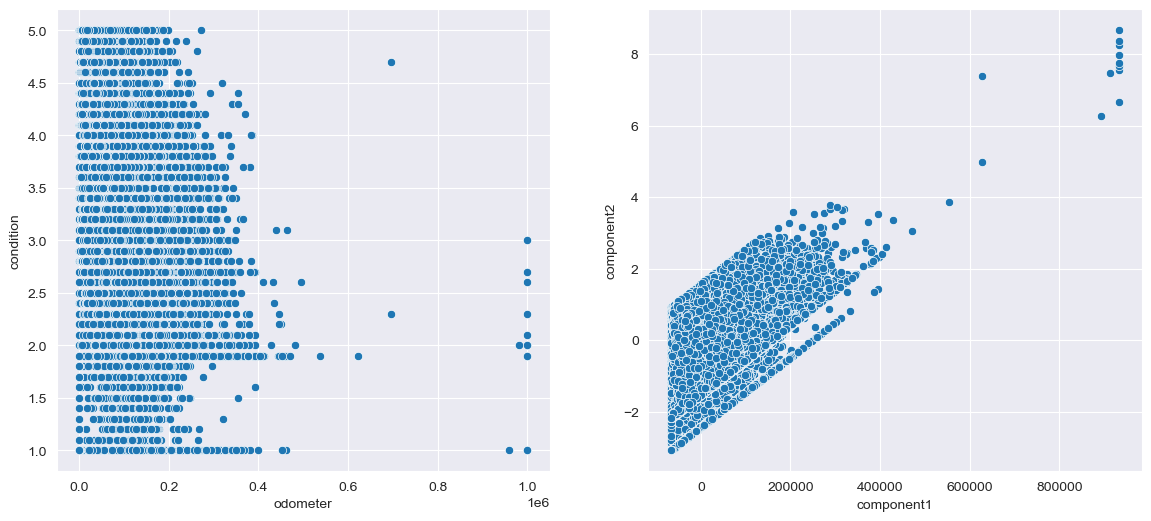

In [214]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train[['odometer','condition']])

X_pca = pd.DataFrame(X_pca,columns=['component1','component2'])


fig,ax=plt.subplots(1,2,figsize=(14,6))
sns.scatterplot(x='odometer',y='condition',data=X_train,ax=ax[0]);
sns.scatterplot(x='component1',y='component2',data=X_pca,ax=ax[1]);

## Conclusion
#### From both linear model and random forest model, the features condition and odometer are important. And this is reasonable since car with better condition and less distance been travelled since manufactured usually can be sold with a good price. 
#### Some interesting findings from linear model is that whether a car is yellow or not can determine its price to a large extend. This may can be explained by the fact that there are few yellow cars in vehicle market, so yellow cars usually have common attributes, such as made by luxury brand. Thus they tend to have similar aunction price. And whether a car is Acura can also affect the price a lot. This may be due to the reason that Acura only manufactured cars of similar grade and thus have similar aunction price.
#### Another surprising result is that random forest model has poor performance in terms of R^2, though we only used part of features trained in Linear Model. But this is because of the amount of time needed to fit the model. Besides, we also found overfitting issues in random forest model. Considering the time and overfitting issue, maybe linear model will be a better model here. 